In [1]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [74]:
with open('박카스.json') as json_file:
    json_data = json.load(json_file)

In [75]:
df = pd.DataFrame(json_data['data'])

In [76]:
df

,index,Post,Hashtags,Locates,Date,Likes
0,0,[카페인 달고살던 평일은 이제 그만 보내...,"[아이폰, 아이폰x, shotoniphone, 휴식, 주말, 금요일, 박카스, 광고...",[서울 어딘가],2020년 10월 16일,[327]
1,1,[2020.3.3🍺박카스🍺\n😎유튜브에 과정 영상 있습니다😎\n.\n.\n.\n.\...,"[기초디자인, 기디, 개체묘사, 개체표현, 드로잉, 일러스트, 미대입시, 미술, 수...","[Busan 釜山, South Korea]",2020년 4월 26일,"[1,166]"
2,2,[#예스24굿즈 #10월예스24굿즈 #증정이벤트\nYES24X박카스(@dongaba...,"[예스24굿즈, 10월예스24굿즈, 증정이벤트, 박카스폴딩박스SET, 박카스와펜보냉...",[],2020년 10월 15일,"[2,008]"
3,3,[박카스🥃유튜브에 과정 영상 있습니다\nChe...,"[기초디자인, 기디, 개체묘사, 개체표현, 드로ᄋ...",[],2020년 9월 1일,"[1,268]"
4,4,[내 최애💛박카스젤리 신맛💛신상 뜸!!!!\n신맛 가루가 챱챱 붙어있는데\n쫀득쫀득...,"[박카스젤리신맛, 박카스젤리사우어, 박카스젤리, 박카스, 젤리, 박카스맛젤리신맛, ...",[],2020년 10월 13일,"[1,134]"
...,...,...,...,...,...,...
9995,9995,[😵😵😵😵\n⠀⠀⠀\n#박카스 좀 마셔야할까봐.\n⠀⠀⠀\n#하원후 #놀이터죽돌이 ...,"[박카스, 하원후, 놀이터죽돌이, 멋짐폭발, 바톤터치, 육퇴, 놀이터, 6살, 청말...",[],2019년 6월 25일,[29]
9996,9996,[인생 오래 살고 볼 일이야 내가 그림을 그리다늬... #박카스 #그림 #을 #잘 ...,"[박카스, 그림, 을, 잘, 그리고, 싶다]",[],2019년 6월 25일,[20]
9997,9997,[정신없는 육아맘의 하루ㅋ\n첫째등원시키고 박카스 1병 원샷때리고 충전완료ㅋㅋ\n....,"[백종원오이냉국, 육아맘일상, 자매육아일기, 4살아이일상, 6개월아기, 박카스, 카...",[],2019년 6월 25일,[56]
9998,9998,[너만 만나면 광대가 아파🤣 힘내자 우리!],"[화분에물좀그만줘라, 친구, 힘내자, 박카스]",[],2019년 6월 25일,[38]


# Hashtags 분석

# 1. Word Cloud

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [78]:
tags = [element for array in list(df.Hashtags) for element in array]

In [79]:
tags[0:5]

['아이폰', '아이폰x', 'shotoniphone', '휴식', '주말']

In [80]:
monster_stop_words = ['error','몬스터에너지','몬스터', '에너지','monsterenergy', '에너지드링크','박카스','비타500'\
                     , '몬스터에너지울트라', '캔구루', '핫식스', '레드불', '비타500', '카페인대신비타500', '카페인대신비타500	'\
                     '건강한비타민c', 'redbull','건강한비타민c', '카페인대신비타500','박카스' ]

In [81]:
cv = CountVectorizer(max_features=10000, stop_words = monster_stop_words)

In [82]:
tdm = cv.fit_transform(tags)

In [83]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [84]:
word_count.sort_values('빈도', ascending=False).head(15)

,단어,빈도
7558,일상,1362
5535,소통,611
3442,동아제약,549
8127,좋아요,544
9374,피로회복,541
3317,데일리,474
363,daily,470
3971,맞팔,468
9379,피로회복제,410
1590,감사합니다,404


In [85]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [86]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

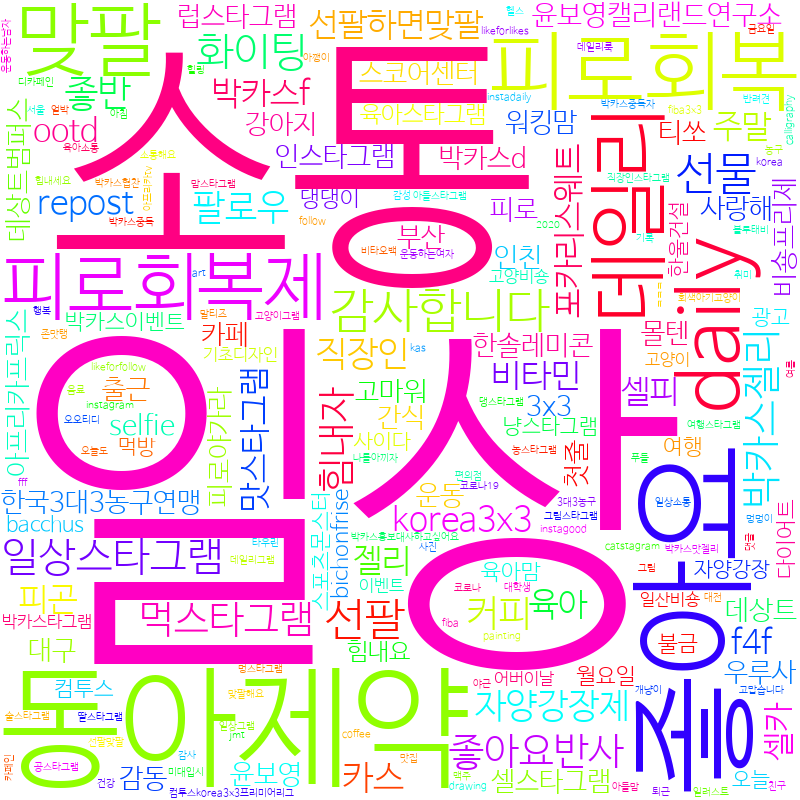

In [87]:
cloud.to_image()

# 2. Embedding

### - LSA

### - tags

In [88]:
tdm.shape

(128431, 10000)

In [89]:
# one hot encoding
import numpy as np

one_hot = np.eye(10000)

In [90]:
words = cv.get_feature_names()

In [91]:
tokens = tags

In [92]:
%%time
doc = np.zeros((1, 10000))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 3min 28s


In [93]:
from sklearn.decomposition import TruncatedSVD

In [94]:
svd = TruncatedSVD(n_components=1000)

In [95]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [96]:
svd.components_.shape

(1000, 10000)

In [97]:
word_emb = svd.components_.T

In [98]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

일상 7558
소통 5535
동아제약 3442
좋아요 8127
피로회복 9374
데일리 3317
daily 363
맞팔 3971
피로회복제 9379
감사합니다 1590
박카스 1071
선팔 5429
선물 5418
화이팅 9811
일상스타그램 7575
박카스젤리 4555
먹스타그램 4045
힘내자 9970
좋아요반사 8130
커피 8927
좋반 8119
팔로우 9246
직장인 8352
자양강장제 7683
카스 8834
비타민 5071
박카스f 4483
repost 820
선팔하면맞팔 5434
f4f 437
셀카 5498
korea3x3 659
피곤 9345
젤리 8025
맛스타그램 3927
셀피 5503
포카리스웨트 9302
주말 8169
육아 7232
ootd 767
윤보영캘리랜드연구소 7281
첫줄 8597
박카스d 4481
인친 7508
럽스타그램 3692
selfie 840
감동 1567
강아지 1661
3x3 103
대구 3122
사랑해 5160
한국3대3농구연맹 9461
셀스타그램 5497
윤보영 7275
부산 4914
데상트범퍼스 3309
출근 8735
카페 8851
한솔레미콘 9485
인스타그램 7476
데상트 3307
고마워 1935
워킹맘 7079
피로야가라 9365
운동 7017
피로 9359
우루사 6980
스코어센터 5694
아프리카프릭스 6099
비숑프리제 5046
간식 1531
티쏘 9213
몰텐 4207
힘내요 9966
육아스타그램 7256
박카스이벤트 4552
스포츠몬스터 5735
육아맘 7242
여행 6524
컴투스 8953
다이어트 3009
불금 4995
댕댕이 3270
월요일 7123
한울건설 9493
bichonfrise 242
오늘 6753
냥스타그램 2811
먹방 4039
사이다 5188
자양강장 7682
bacchus 221
이벤트 7378
어버이날 6329
박카스타그램 4565
광고 2100
컴투스korea3x3프리미어리그 8955
일산비숑 7554
기초디자인 2444
고양이 1967


In [99]:
word_emb = svd.components_.T

In [100]:
from adjustText import adjust_text
from matplotlib import pyplot
from matplotlib import font_manager, rc

In [101]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 4min 44s


225

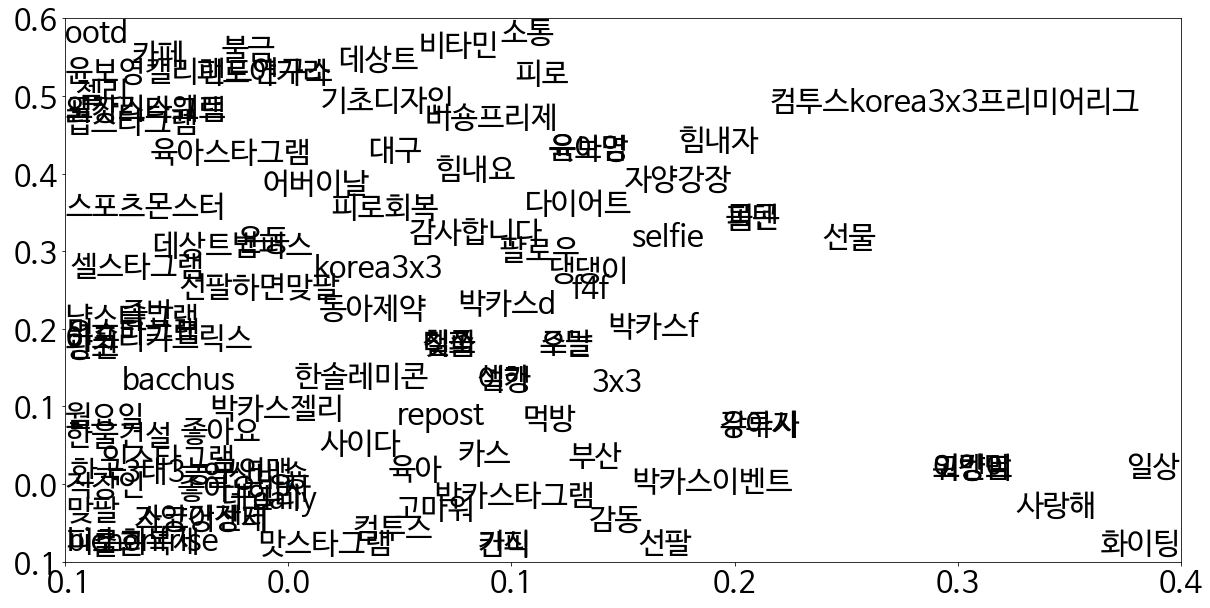

In [102]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

pyplot.xlim(-0.1, 0.4)
pyplot.ylim(-0.1, 0.6)

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - T-SNE

In [103]:
from sklearn.manifold import TSNE

In [104]:
tsne = TSNE()

In [105]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 18min 32s


166

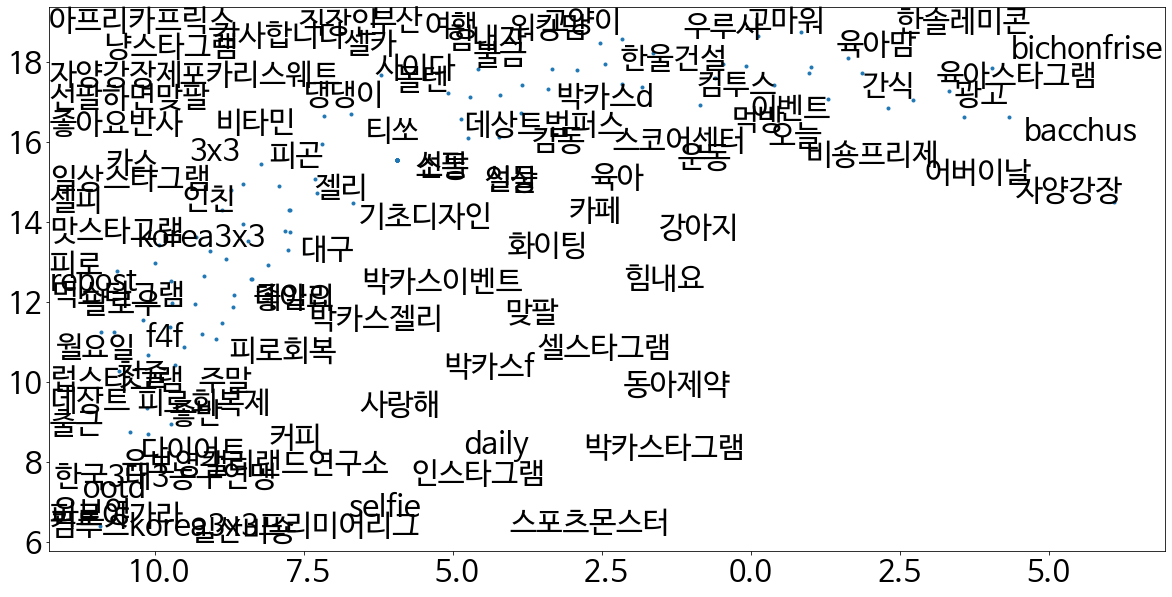

In [106]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - Word2Vec

In [107]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

In [108]:
sentences = list(df['Hashtags'])

In [109]:
model = Word2Vec(sentences, size = 1000, min_count = 100, workers = 4, window = 100) # negative, sg

In [110]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [111]:
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [112]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

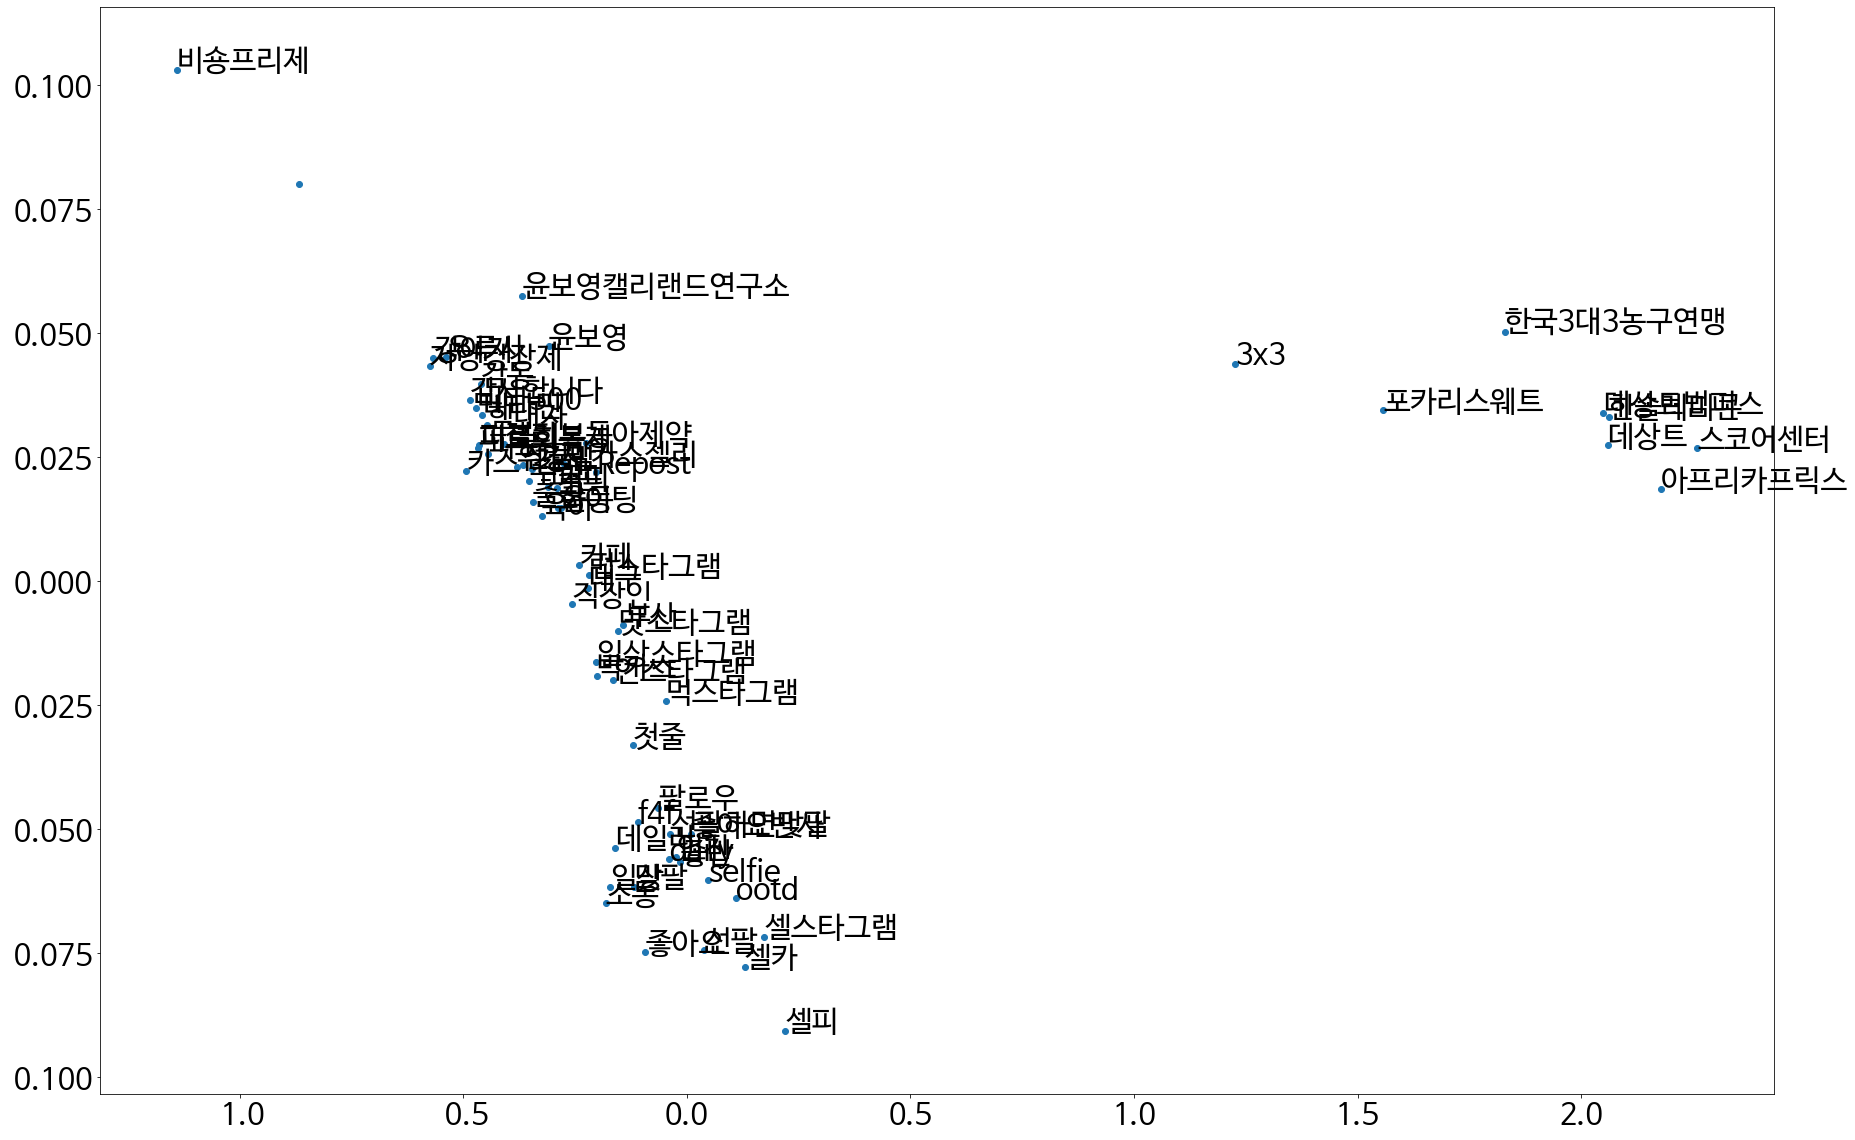

In [113]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))

# Location 분석

## - Word Cloud

In [114]:
locates = [element for array in list(df.Locates) for element in array]

In [115]:
monster_lc_stop_words = ['error','','south','korea']
cv = CountVectorizer(max_features=10000, stop_words = monster_lc_stop_words)
tdm = cv.fit_transform(locates)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [116]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
465,seoul,108
135,daegu,59
1100,박카스,57
72,busan,48
1488,어딘가,31


In [117]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [118]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

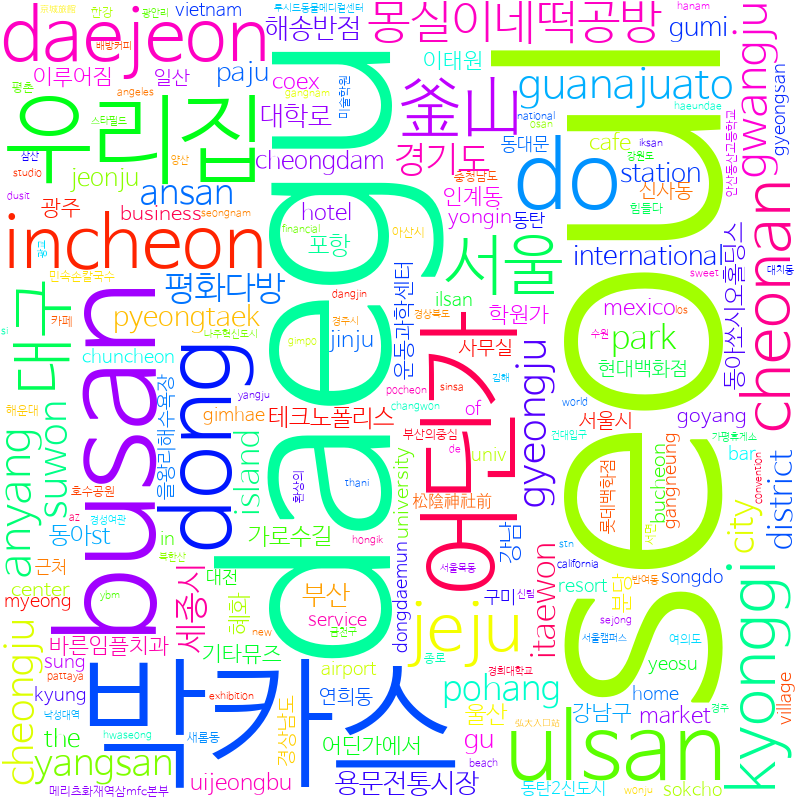

In [119]:
cloud.to_image()

## - Embedding

- LSA

In [120]:
tdm.shape

(2269, 2103)

In [121]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [122]:
words = cv.get_feature_names()
tokens = locates

In [123]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 112 ms


In [124]:
%%time
svd = TruncatedSVD(n_components=1000)
svd.fit(tdm)

Wall time: 2.48 s


TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [125]:
svd.components_.shape

(1000, 2103)

In [126]:
word_emb = svd.components_.T

In [127]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

seoul 465
daegu 135
박카스 1100
busan 72
어딘가 1488
우리집 1599
do 151
dong 155
ulsan 546
incheon 266
daejeon 136
釜山 609
서울 1259
jeju 282
kyonggi 314
대구 861
cheonan 95
몽실이네떡공방 1057
anyang 27
gwangju 227
guanajuato 218
gyeongju 230
경기도 654
suwon 518
yangsan 577
cheongju 98
ansan 25
세종시 1307
pohang 421
평화다방 1961
city 113
용문전통시장 1585
해송반점 2032
district 148
부산 1165
island 273
대학로 893
itaewon 275
park 406
pyeongtaek 427
station 504
international 271
gumi 219
paju 402
gu 217
강남 627
jeonju 284
포항 1967
the 532
혜화 2053
가로수길 612
동아쏘시오홀딩스 937
테크노폴리스 1923
울산 1609
cheongdam 96
동아st 935
기타뮤즈 761
jinju 289
운동과학센터 1604
hotel 253
인계동 1677
광주 710
분당 1185
cafe 75
coex 118
이태원 1673
mexico 352
바른임플치과 1098
어딘가에서 1489
학원가 2000
uijeongbu 542
강남구 629
이루어짐 1658
market 341
goyang 210
일산 1698
을왕리해수욕장 1645
서울시 1267
연희동 1529
신사동 1402
yongin 586
center 86
사무실 1210
경상남도 661
bucheon 66
university 549
business 73
현대백화점 2050
근처 753
chuncheon 106
해운대 2035
home 247
gangneung 188
gyeongsan 231
동대문 923
한강 2001
아산시 1421
dongdaemun 1

In [128]:
word_emb = svd.components_.T

In [129]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 1min 48s


223

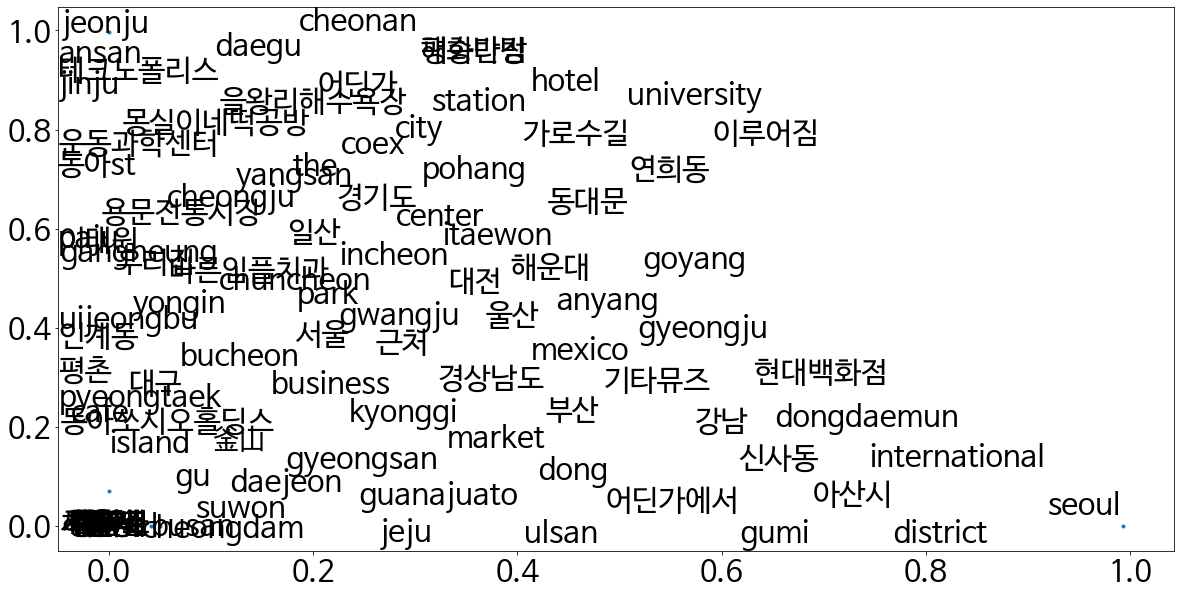

In [130]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

- T-SNE

In [131]:
tsne = TSNE()

In [132]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 32.2 s


219

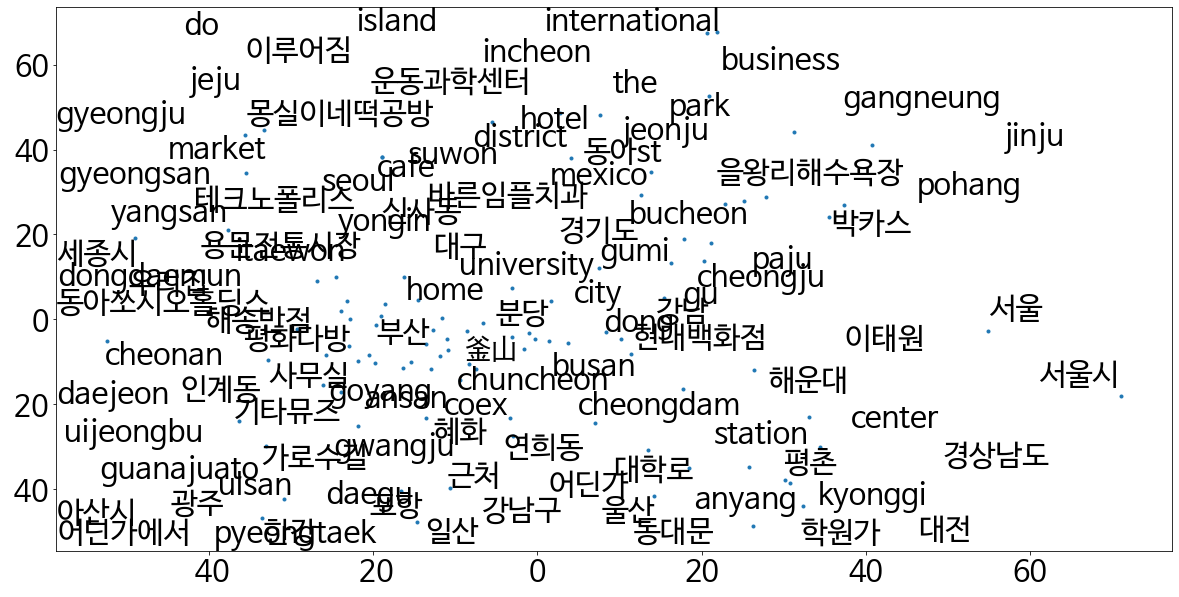

In [133]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

- Word2Vec

In [134]:
sentences = list(df['Locates'])

In [135]:
model = Word2Vec(sentences, size = 1000, min_count = 20, workers = 4, window = 100)

In [136]:
%%time

word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

Wall time: 998 µs


In [137]:
%%time
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

Wall time: 2.99 ms


In [138]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

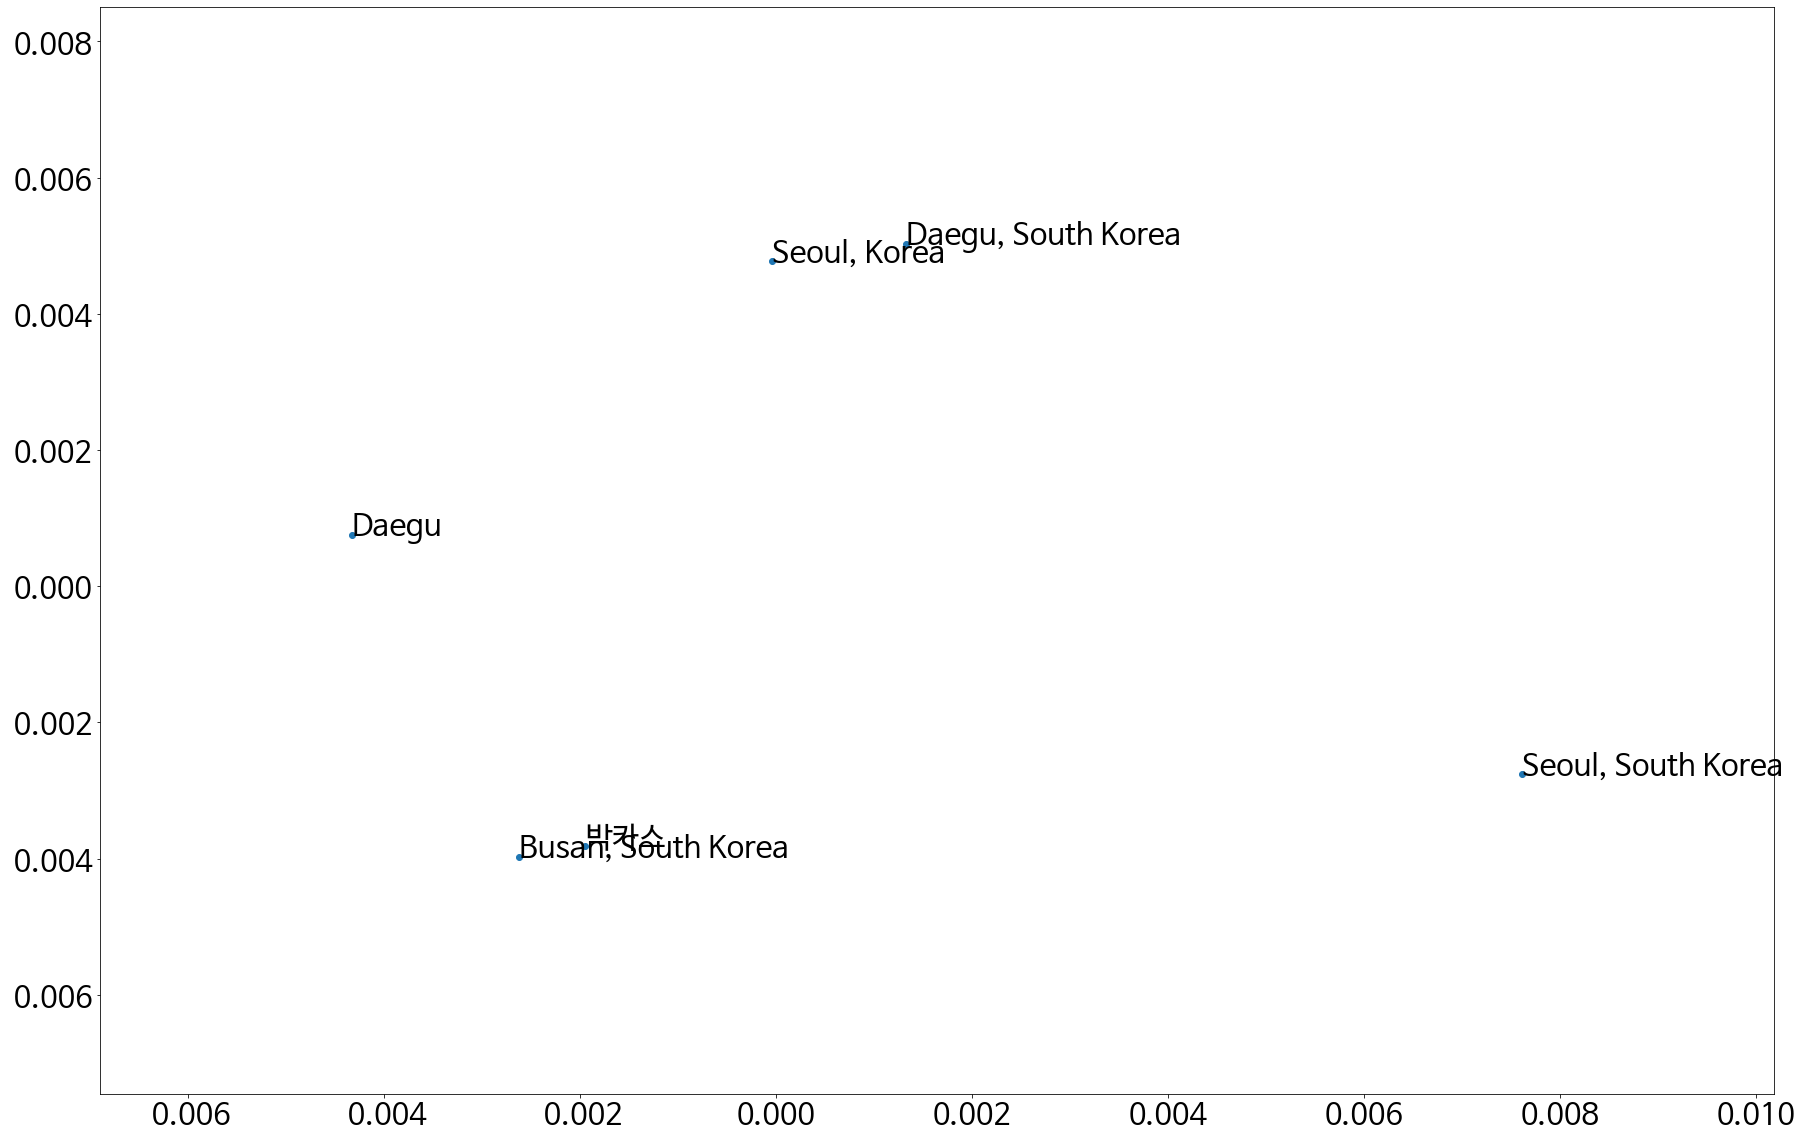

In [139]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))